# Modellaufbau und Training

---

Autor: mn086

---

## Setup

In [1]:
import os
from typing import List, Dict, Tuple
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
import altair as alt
import joblib

## Daten-Import

**Pfade:**

In [2]:
root_processed = os.path.join('..', 'data', 'processed')
root_models = os.path.join('..', 'models')

**Import in Dataframes**

In [3]:
# Datensatz mit Ausrei√üer
df_regr = pd.read_csv(os.path.join(root_processed, 'regression_data.csv'))
# Datensatz ohne Ausrei√üer
df_regr_filtered = pd.read_csv(os.path.join(root_processed, 'regression_data_filtered.csv'))

## Daten-Struktur

In [4]:
df_regr.tail(3)

anzahl_personen_1000      vee  anzahl_kfz_je_person  unfaelle_je_10k_kfz  \
396                   NaN  25966.0                   NaN                 50.5   
397                   NaN  26021.0                   NaN                 51.7   
398                   NaN  25954.0                   NaN                 63.3   

      elektro       pih     euro2     euro3      euro4      euro6   euro6dt  
396  0.246801  0.123908  5.708917  6.968312  27.723949  23.002234  4.853748  
397  0.279993  0.168433  6.172961  7.648391  27.577080  22.237534  5.418294  
398  0.344202  0.192435  4.607541  6.389057  24.128833  26.149405  6.292839

In [5]:
df_regr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   anzahl_personen_1000  216 non-null    float64
 1   vee                   399 non-null    float64
 2   anzahl_kfz_je_person  216 non-null    float64
 3   unfaelle_je_10k_kfz   399 non-null    float64
 4   elektro               399 non-null    float64
 5   pih                   399 non-null    float64
 6   euro2                 399 non-null    float64
 7   euro3                 399 non-null    float64
 8   euro4                 399 non-null    float64
 9   euro6                 399 non-null    float64
 10  euro6dt               399 non-null    float64
dtypes: float64(11)
memory usage: 34.4 KB


In [6]:
df_regr_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   anzahl_personen_1000  215 non-null    float64
 1   vee                   398 non-null    float64
 2   anzahl_kfz_je_person  215 non-null    float64
 3   unfaelle_je_10k_kfz   398 non-null    float64
 4   elektro               398 non-null    float64
 5   pih                   398 non-null    float64
 6   euro2                 398 non-null    float64
 7   euro3                 398 non-null    float64
 8   euro4                 398 non-null    float64
 9   euro6                 398 non-null    float64
 10  euro6dt               398 non-null    float64
dtypes: float64(11)
memory usage: 34.3 KB


## Variablen Listen

In [7]:
y_label = "euro4"
features = ["vee", "unfaelle_je_10k_kfz", "elektro", "pih", "euro2", "euro3", "euro6dt"]

# Daten mit Ausrei√üer
X = df_regr[features]
y = df_regr[y_label]
# Datensatz ohne Ausrei√üer
X_filtered = df_regr_filtered[features]
y_filtered = df_regr_filtered[y_label]

y_label = "euro6dt"
features = ["vee", "unfaelle_je_10k_kfz", "elektro", "pih", "euro2", "euro3", "euro4"]

X = df_regr[features]
y = df_regr[y_label]

## Daten aufteilen, Train-Test-Split

In [8]:
# Daten mit Ausrei√üer
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 20% Testdaten
    random_state=42    # F√ºr Reproduzierbarkeit
)
# Daten ohne Ausrei√üer
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, 
    test_size=0.2,     # 20% Testdaten
    random_state=42    # F√ºr Reproduzierbarkeit
)

## Modell

### Auswahl des Modells

In [9]:
regr = LinearRegression()

### Modell mit Ausrei√üer trainieren

In [10]:
regr.fit(X_train, y_train)

LinearRegression()

In [11]:
# Modell speichern
joblib.dump(regr, os.path.join(root_models, "lineare_regression_mit_ausreisser.joblib"))

['..\\models\\lineare_regression_mit_ausreisser.joblib']

Im Rahmen der Analyse wird das Bestimmtheitsma√ü R¬≤ f√ºr das multiple lineare Regressionsmodell sowohl f√ºr die Trainings- als auch f√ºr die Testdaten berechnet. Dabei werden die Daten inklusive eines identifizierten Ausrei√üers verwendet.

In [12]:
# Bestimmtheitsma√ü R¬≤ f√ºr Trainings- und Test Daten mit Ausrei√üer berechnen
r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)

print(f'R¬≤ Training: {r2_train:.4f}')
print(f'R¬≤ Test: {r2_test:.4f}')

R¬≤ Training: 0.8823
R¬≤ Test: 0.8002


Diese Ergebnisse zeigen, dass das Modell eine hohe Erkl√§rungskraft f√ºr die Trainingsdaten aufweist und auch auf den Testdaten eine gute Generalisierbarkeit besitzt. Das Modell kann somit als robust und zuverl√§ssig angesehen werden, obwohl ein Ausrei√üer in den Daten vorhanden ist.

Die Leistung auf den Testdaten ist etwas schlechter und betr√§gt etwa 0.082, was einem Leistungsabfall von ca. 8.2 Prozentpunkten entspricht. Eine etwas schlechtere Performance auf den Testdaten ist ein typisches Ph√§nomen. Die Differenz liegt im √ºblichen Rahmen und ist nicht so gro√ü, dass von Overfitting gesprochen werden m√ºsste.

In [13]:
# Bestimmtheitsma√ü R¬≤ f√ºr Trainings- und Test Daten ohne Ausrei√üer berechnen
r2_train_filterd = regr.score(X_train_filtered, y_train_filtered)
r2_test_filterd = regr.score(X_test_filtered, y_test_filtered)

print(f'R¬≤ Training: {r2_train_filterd:.4f}')
print(f'R¬≤ Test: {r2_test_filterd:.4f}')

R¬≤ Training: 0.8793
R¬≤ Test: 0.8313


Die Leistung auf den Testdaten verbessert sich, wenn der Ausrei√üer entfernt wird, was darauf hindeutet, dass der Ausrei√üer die Modellleistung negativ beeinflusst.

### Modell ohne Ausrei√üer trainieren

In [14]:
regr.fit(X_train_filtered, y_train_filtered)

LinearRegression()

In [15]:
# Modell speichern
joblib.dump(regr, os.path.join(root_models, "lineare_regression_ohne_ausreisser.joblib"))

['..\\models\\lineare_regression_ohne_ausreisser.joblib']

In [16]:
# Bestimmtheitsma√ü R¬≤ f√ºr Trainings- und Test Daten ohne Ausrei√üer berechnen
r2_train_filterd = regr.score(X_train_filtered, y_train_filtered)
r2_test_filterd = regr.score(X_test_filtered, y_test_filtered)

print(f'R¬≤ Training: {r2_train_filterd:.4f}')
print(f'R¬≤ Test: {r2_test_filterd:.4f}')

R¬≤ Training: 0.8806
R¬≤ Test: 0.8244


Das Modell ohne Ausrei√üer zeigt eine konsistente Leistung auf Trainings- und Testdaten, was auf eine bessere Generalisierbarkeit hinweist. Daher sollte dieses Modell bevorzugt werden.

**R¬≤ = 0.88 auf Testdaten bedeutet:**

1. **Interpretation des R¬≤-Werts**:
   - 88% der Varianz in den Testdaten wird durch das Modell erkl√§rt
   - Ein Wert von 1.0 w√§re perfekte Vorhersage
   - Ein Wert von 0.0 bedeutet keine Vorhersagekraft

2. **Bewertung**:
   - Guter Wert f√ºr reale Daten
   - Zeigt starken Zusammenhang zwischen Features und Zielvariable
   - Modell hat gute Generalisierungsf√§higkeit, da auf Testdaten gemessen

3. **Einschr√§nkungen**:
   - Etwa 12% der Varianz bleiben unerkl√§rt
   - Weitere Faktoren k√∂nnten Einfluss haben
   - M√∂gliche nicht-lineare Zusammenh√§nge werden nicht erfasst

**Vergleichende Analyse der Modelle**

| Metrik | Mit Ausrei√üer | Ohne Ausrei√üer | Differenz |
|--------|---------------|----------------|-----------|
| R¬≤ Training | 0.8823 | 0.8806 | -0.0017 |
| R¬≤ Test | 0.8002 | 0.8244 | +0.0242 |

Die Entfernung des Ausrei√üers f√ºhrt zu folgenden Verbesserungen:
- Minimaler R√ºckgang der Trainingsperformance (-0.17 Prozentpunkte)
- Deutliche Verbesserung der Testperformance (+2.42 Prozentpunkte)
- Geringere Differenz zwischen Training und Test (von 8.21 auf 5.62 Prozentpunkte)

Das Modell ohne Ausrei√üer zeigt eine bessere Generalisierungsf√§higkeit und stabilere Performance, was f√ºr dessen Verwendung in der weiteren Analyse spricht.

### R√ºckw√§rtseliminierung mit adjustiertes R¬≤

#### Vergleich R¬≤ vs. adjustiertes R¬≤

- Regul√§res R¬≤ ist typischerweise h√∂her als adjustiertes R¬≤
- **Aber**: R¬≤ steigt automatisch mit der Anzahl der Features und bedeutet nicht unbedingt ein besseres Modell, da es durch zus√§tzliche Features k√ºnstlich aufgebl√§ht sein k√∂nnte.
- Adjustiertes R¬≤ ber√ºcksichtigt die Anzahl der Features und bestraft Overfitting. Daher ist adjustiertes R¬≤ aussagekr√§ftiger f√ºr die Modellbewertung

In [17]:
def calculate_adjusted_r2(X: pd.DataFrame, 
                        y: pd.Series, 
                        model: LinearRegression = None) -> float:
    """
    Berechnet das angepasste R¬≤ f√ºr ein lineares Regressionsmodell.
    
    Args:
        X (pd.DataFrame): Features/Pr√§diktoren Matrix
        y (pd.Series): Zielvariable
        model (LinearRegression, optional): Vortrainiertes lineares Regressionsmodell.
            Falls None, wird ein neues Modell erstellt und trainiert.
    
    Returns:
        float: Angepasstes Bestimmtheitsma√ü (R¬≤)
            - Wertebereich: (-‚àû, 1]
            - 1: perfekte Vorhersage
            - 0: Modell ist nicht besser als der Mittelwert
            - < 0: Modell ist schlechter als der Mittelwert
            - Ber√ºcksichtigt die Anzahl der Features (p) und Beobachtungen (n)
            - Formel: 1 - (1 - R¬≤) * (n-1)/(n-p-1)
    """
    if model is None:
        model = LinearRegression()
        model.fit(X, y)
    n, p = X.shape  # n: Anzahl der Beobachtungen, p: Anzahl der Features
    r2 = model.score(X, y)  # Bestimmtheitsma√ü R¬≤
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [18]:
print(f'Angepasstes R¬≤ Training: {calculate_adjusted_r2(X_train_filtered, y_train_filtered, model=regr):.4f}')
print(f'Angepasstes R¬≤ Test: {calculate_adjusted_r2(X_test_filtered, y_test_filtered, model=regr):.4f}')

Angepasstes R¬≤ Training: 0.8779
Angepasstes R¬≤ Test: 0.8073


Mit Hilfe der Funktion `backward_elimination()` soll eine R√ºckw√§rtselimination durchgef√ºhrt werden: Es wird gepr√ºft, ob das Entfernen eines Pr√§diktors das adjustierte ùëÖ¬≤ verbessern w√ºrde. Dazu wird jeweils ein anderer Pr√§diktor ausgeschlossen und das adjustierte ùëÖ¬≤ notiert. Das h√∂chste adjustierte ùëÖ¬≤, welches h√∂her als das adjustierte ùëÖ¬≤ des vollst√§ndigen Modells sein muss, beschreibt das neue Basismodell. Diese Schritte werden durchlaufen und erneut √ºberpr√ºft, bis das h√∂chste adjustierte ùëÖ¬≤ kleiner oder gleich dem adjustierten ùëÖ¬≤ des Basismodells ist (ein weiterer Ausschluss eines der verbleibenden Pr√§diktoren w√ºrde zur Verschlechterung des Modells f√ºhren).

In [19]:
def backward_elimination(X: pd.DataFrame, 
                       y: pd.Series, 
                       verbose: bool = True) -> Tuple[List[str], float, List[Dict]]:
    """
    F√ºhrt eine R√ºckw√§rtselimination basierend auf dem adjustierten R¬≤ durch.
    
    Args:
        X (pd.DataFrame): Feature-Matrix
        y (pd.Series): Zielvariable
        verbose (bool): Wenn True, werden Zwischenergebnisse ausgegeben
    
    Returns:
        Tuple[List[str], float, List[Dict]]: 
            - Liste der besten Features
            - Finales adjustiertes R¬≤
            - Historie der Elimination
    """
    features = list(X.columns)
    elimination_history = []
    
    # Initiales Modell
    best_adj_r2 = calculate_adjusted_r2(X, y)
    best_features = features.copy()
    
    if verbose:
        print(f"Start mit {len(features)} Features, Adj. R¬≤ = {best_adj_r2:.4f}")
    
    while len(features) > 1:
        results = {}
        # Evaluiere alle m√∂glichen Feature-Kombinationen parallel
        for feature in features:
            remaining_features = [f for f in features if f != feature]
            X_subset = X[remaining_features]
            results[feature] = calculate_adjusted_r2(X_subset, y)
        
        # Finde bestes Ergebnis
        best_feature = max(results.items(), key=lambda x: x[1])
        
        # Pr√ºfe ob Verbesserung
        if best_feature[1] > best_adj_r2:
            removed_feature = best_feature[0]
            best_adj_r2 = best_feature[1]
            features.remove(removed_feature)
            best_features = features.copy()
            
            elimination_history.append({
                'step': len(elimination_history) + 1,
                'removed_feature': removed_feature,
                'adj_r2': best_adj_r2,
                'n_features': len(features)
            })
            
            if verbose:
                print(f"Feature '{removed_feature}' entfernt: Adj. R¬≤ = {best_adj_r2:.4f}")
        else:
            break
            
    return best_features, best_adj_r2, elimination_history

In [20]:
# R√ºckw√§rtselimination mit Ausrei√üer durchf√ºhren
best_features, final_adj_r2, history = backward_elimination(X_train, y_train)

Start mit 7 Features, Adj. R¬≤ = 0.8797


In [21]:
# Ergebnisse ausgeben
print(f"Bestes adjustiertes R¬≤: {final_adj_r2:.4f}")
print("\nSelektierte Features:")
for feature in best_features:
    print(f"- {feature}")

print("\nEliminations-Historie:")
if not history:
    print("\nEs wurden keine Features entfernt.")
else:
    for step in history:
        print(f"\nEntferntes Feature: {step['removed_feature']}")
        print(f"Adjustiertes R¬≤: {step['adj_r2']:.4f}")

Bestes adjustiertes R¬≤: 0.8797

Selektierte Features:
- vee
- unfaelle_je_10k_kfz
- elektro
- pih
- euro2
- euro3
- euro6dt

Eliminations-Historie:

Es wurden keine Features entfernt.


In [22]:
# R√ºckw√§rtselimination ohne Ausrei√üer durchf√ºhren
best_features, final_adj_r2, history = backward_elimination(X_train_filtered, y_train_filtered)

Start mit 7 Features, Adj. R¬≤ = 0.8779
Feature 'elektro' entfernt: Adj. R¬≤ = 0.8779


In [23]:
# Ergebnisse ausgeben
print(f"Bestes adjustiertes R¬≤: {final_adj_r2:.4f}")
print("\nSelektierte Features:")
for feature in best_features:
    print(f"- {feature}")

print("\nEliminations-Historie:")
if not history:
    print("\nEs wurden keine Features entfernt.")
else:
    for step in history:
        print(f"\nEntferntes Feature: {step['removed_feature']}")
        print(f"Adjustiertes R¬≤: {step['adj_r2']:.4f}")

Bestes adjustiertes R¬≤: 0.8779

Selektierte Features:
- vee
- unfaelle_je_10k_kfz
- pih
- euro2
- euro3
- euro6dt

Eliminations-Historie:

Entferntes Feature: elektro
Adjustiertes R¬≤: 0.8779


Die R√ºckw√§rtselimination zeigt interessante Unterschiede zwischen den Modellen:

Modell mit Ausrei√üer:
- Startwert des adjustierten R¬≤ bei 0.8797
- Keine Pr√§diktoren wurden eliminiert
- Alle sieben Features tragen signifikant zur Modellg√ºte bei

Modell ohne Ausrei√üer:
- Startwert des adjustierten R¬≤ bei 0.8779
- Feature 'elektro' wurde als einziges eliminiert
- Die Elimination f√ºhrt zu keiner Verschlechterung des adjustierten R¬≤

Der Ausrei√üer befindet sich der Variable `elektro`. Nach dessen Entfernung verliert diese Variable ihre Bedeutung f√ºr das Modell, w√§hrend die √ºbrigen Pr√§diktoren weiterhin relevant bleiben. Die nahezu identischen R¬≤-Werte vor und nach der Elimination zeigen, dass `elektro` keinen substanziellen Beitrag zur Modellg√ºte leistet.

In [24]:
# Modell trainieren mit den besten Pr√§diktoren
regr.fit(X_train_filtered[best_features], y_train_filtered)

LinearRegression()

In [25]:
# Modell speichern
joblib.dump(regr, os.path.join(root_models, "lineare_regression_ohne_ausreisser_rweliminiert.joblib"))

['..\\models\\lineare_regression_ohne_ausreisser_rweliminiert.joblib']

In [26]:
# Berechne und zeige die Modellg√ºte mittels adjustierten R¬≤
print(f'Angepasstes R¬≤ Training: {calculate_adjusted_r2(X_train_filtered[best_features], y_train_filtered, model=regr):.4f}')
print(f'Angepasstes R¬≤ Test: {calculate_adjusted_r2(X_test_filtered[best_features], y_test_filtered, model=regr):.4f}')

Angepasstes R¬≤ Training: 0.8779
Angepasstes R¬≤ Test: 0.8122


### Kreuzvalidierung

Die Kreuzvalidierung bietet eine umfassendere Bewertung der Modellleistung. Der Mittelwert und die Standardabweichung der Kreuzvalidierungsergebnisse helfen, die Robustheit und Konsistenz des Modells zu beurteilen. Es wird empfohlen, die Kreuzvalidierung als zus√§tzlichen Validierungsschritt einzuf√ºhren, um die Generalisierbarkeit des Modells zu best√§tigen.


In [27]:
# Kreuzvalidierung durchf√ºhren (z.B. 5-Fold)
cv_scores = cross_val_score(LinearRegression(), X_train_filtered, y_train_filtered, cv=5, scoring='r2')

# Ergebnisse anzeigen
print(f'Kreuzvalidierungs-R¬≤ Scores: {cv_scores}')
print(f'Mittelwert der Scores: {cv_scores.mean():.4f}')
print(f'Standardabweichung der Scores: {cv_scores.std():.4f}')

Kreuzvalidierungs-R¬≤ Scores: [0.74759209 0.89525384 0.83436319 0.88378105 0.90148455]
Mittelwert der Scores: 0.8525
Standardabweichung der Scores: 0.0575


**Bewertung der Ergebnisse**:
- Die hohe mittlere Performance von 0.85 best√§tigt die G√ºte des Modells und deutet auf gute Generalisierbarkeit hin
- Die moderate Standardabweichung von 0.06 zeigt eine stabile Modellperformance
- Auch der schlechteste Fold (0.75) liefert noch gute Ergebnisse
- Der beste Fold (0.90) zeigt das Potenzial des Modells

Diese Ergebnisse best√§tigen die Robustheit und Zuverl√§ssigkeit des Modells √ºber verschiedene Teilmengen der Daten hinweg.

### Residualanalyse

Durch die Residualanalyse wird sichergestellt, dass das Modell korrekt spezifiziert ist und keine systematischen Fehler aufweist. Dies ist ein wichtiger Schritt zur Validierung und Verbesserung des Modells. Die Diagramme sollten folgende Eigenschaften aufweisen:

1. **Zuf√§llige Verteilung:**
    - **Training:** Residuen sollten zuf√§llig um die Linie y=0 verteilt sein.
    - **Test:** √Ñhnliches Muster wie im Training.

2. **Homoskedastizit√§t:**
    - **Training:** Konstante Streuung der Residuen.
    - **Test:** Keine systematischen Muster.

3. **Normalverteilung:**
    - **Training:** Residuen sollten normalverteilt sein.
    - **Test:** √Ñhnliches Muster wie im Training.

4. **Ausrei√üer:**
    - **Training:** Identifikation und Untersuchung von Ausrei√üern.
    - **Test:** √Ñhnliches Muster wie im Training.

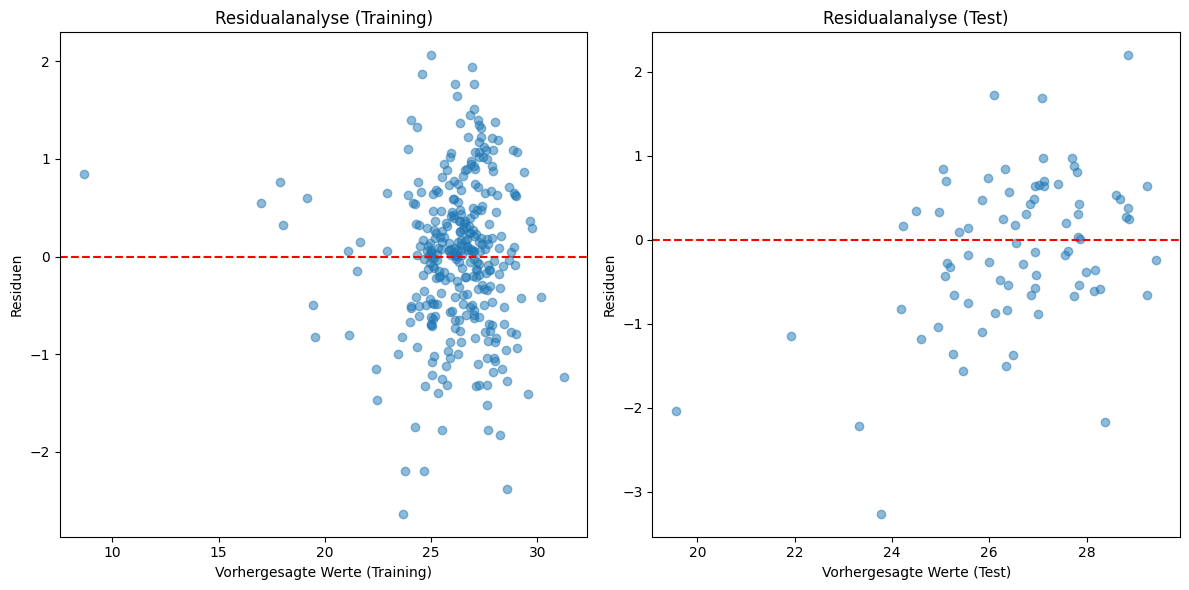

In [28]:
# Beispiel f√ºr Residualanalyse:
import matplotlib.pyplot as plt

# Residuen berechnen
y_train_pred = regr.predict(X_train_filtered[best_features])
y_test_pred = regr.predict(X_test_filtered[best_features])
residuals_train = y_train_filtered - y_train_pred
residuals_test = y_test_filtered - y_test_pred

# Residuen plotten
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals_train, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Vorhergesagte Werte (Training)')
plt.ylabel('Residuen')
plt.title('Residualanalyse (Training)')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Vorhergesagte Werte (Test)')
plt.ylabel('Residuen')
plt.title('Residualanalyse (Test)')

plt.tight_layout()
plt.show()

√úberpr√ºfung der Normalverteilung mittels:

**Histogramm** (Visuelle √úberpr√ºfung der Normalverteilung):
- Sollte eine glockenf√∂rmige Kurve zeigen
- Hinweis auf Normalverteilung

**Q-Q-Plot** (Visuelle √úberpr√ºfung der Normalverteilung):
- Punkte sollten auf der Diagonalen liegen
- Hinweis auf Normalverteilung

**Shapiro-Wilk-Test** (Statistische √úberpr√ºfung der Normalverteilung):
- Nullhypothese: Residuen sind normalverteilt
- p-Wert > 0.05: Keine Ablehnung der Nullhypothese (Normalverteilung)
- p-Wert ‚â§ 0.05: Ablehnung der Nullhypothese (keine Normalverteilung)

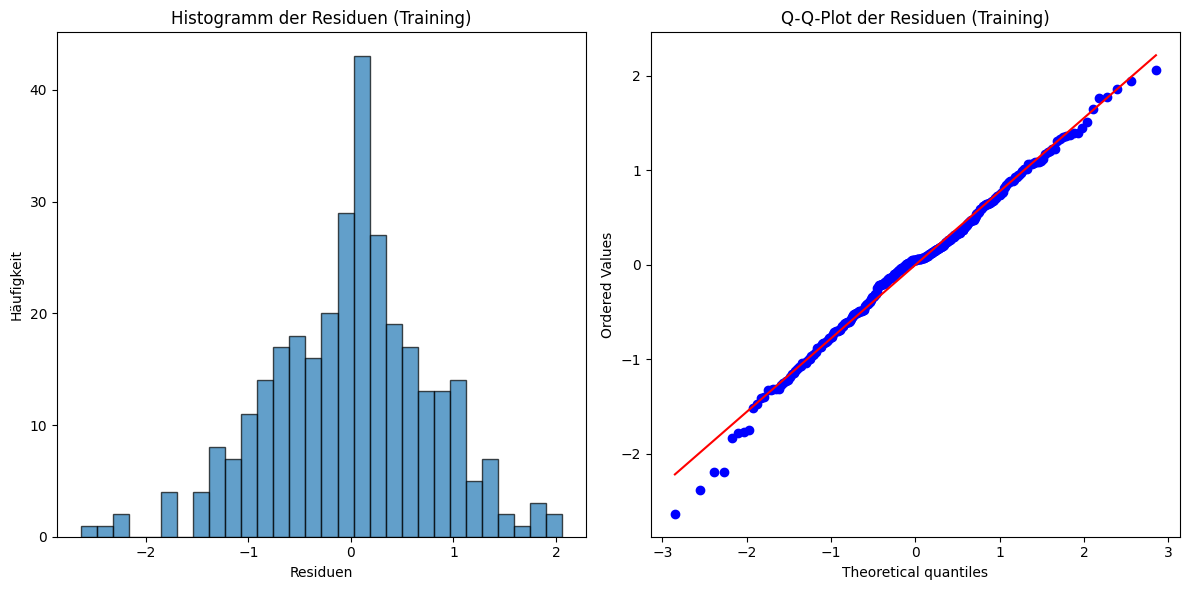

Shapiro-Wilk-Test: W=0.9923, p=0.0980


In [29]:
# Histogramm der Residuen
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuen')
plt.ylabel('H√§ufigkeit')
plt.title('Histogramm der Residuen (Training)')

# Q-Q-Plot der Residuen
plt.subplot(1, 2, 2)
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title('Q-Q-Plot der Residuen (Training)')

plt.tight_layout()
plt.show()

# Shapiro-Wilk-Test f√ºr Normalverteilung
shapiro_test = stats.shapiro(residuals_train)
print(f'Shapiro-Wilk-Test: W={shapiro_test.statistic:.4f}, p={shapiro_test.pvalue:.4f}')

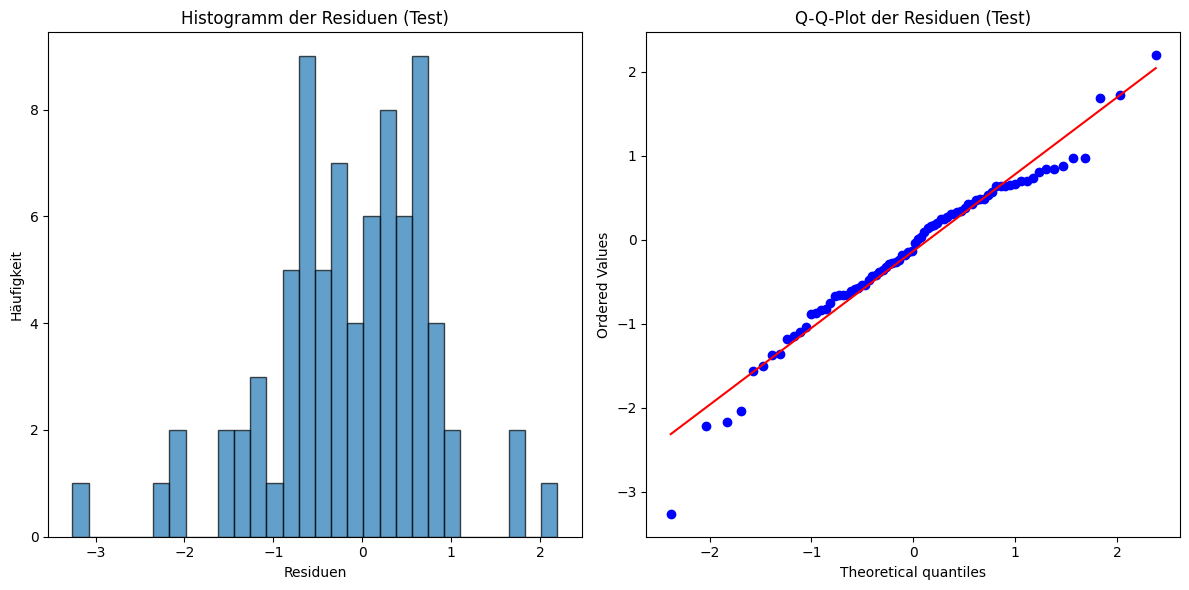

Shapiro-Wilk-Test: W=0.9710, p=0.0659


In [30]:
# Histogramm der Residuen
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals_test, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuen')
plt.ylabel('H√§ufigkeit')
plt.title('Histogramm der Residuen (Test)')

# Q-Q-Plot der Residuen
plt.subplot(1, 2, 2)
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title('Q-Q-Plot der Residuen (Test)')

plt.tight_layout()
plt.show()

# Shapiro-Wilk-Test f√ºr Normalverteilung
shapiro_test = stats.shapiro(residuals_test)
print(f'Shapiro-Wilk-Test: W={shapiro_test.statistic:.4f}, p={shapiro_test.pvalue:.4f}')

Die durchgef√ºhrte Residualanalyse best√§tigt die Erf√ºllung aller wichtigen Modellannahmen (Unabh√§ngigkeit, Homoskedastizit√§t (Varianzhomogenit√§t), Normalverteilung). Diese Ergebnisse untermauern die Validit√§t des gew√§hlten linearen Regressionsmodells.

### Achsenabschnitt und Steigungskoeffizienten

Die Bestimmung von Achsenabschnitt und Steigungskoeffizienten erm√∂glicht:
- Quantifizierung der Zusammenh√§nge zwischen Pr√§diktoren und Zielvariable
- Interpretation der Richtung und St√§rke der Einfl√ºsse
- Aufstellung der Regressionsgleichung

In [31]:
# Intercept (Achsenabschnitt)
intercept = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient": [regr.intercept_]}
    )
# Steigungskoeffizienten
slope = pd.DataFrame({
    "Name": best_features,
    "Coefficient": regr.coef_}
)
# DataFrames kombinieren
table = pd.concat([intercept, slope], ignore_index=True, sort=False)

round(table, 3)

Name  Coefficient
0            Intercept       25.857
1                  vee       -0.000
2  unfaelle_je_10k_kfz       -0.014
3                  pih       -2.099
4                euro2       -0.175
5                euro3        1.329
6              euro6dt       -0.224


Interpretation der Koeffizienten
- Achsenabschnitt (25.857): euro4-Anteil, wenn alle Pr√§diktoren null w√§ren (hat nur mathematisch eine Bedeutung)
- vee: Vernachl√§ssigbarer Einfluss des verf√ºgbaren Einkommens
- unfaelle_je_10k_kfz: Geringer negativer Zusammenhang mit Unfallh√§ufigkeit
- pih: Starker negativer Zusammenhang - Negativer Zusammenhang mit neuerer Technologie
- euro2: Leicht negativer Zusammenhang mit √§lteren Fahrzeugen
- euro3: Positiver Zusammenhang mit zeitlich naher Emissionsklasse
- euro6dt: Negativer Zusammenhang mit neueren Emissionsnormen

Diese Koeffizienten zeigen plausible Zusammenh√§nge: Neuere Technologien (pih, euro6dt) korrelieren negativ mit euro4, w√§hrend die zeitlich n√§here Emissionsklasse euro3 positiv korreliert.

## Fazit

**Identifikation relevanter Pr√§diktoren**
Das entwickelte multiple lineare Regressionsmodell konnte erfolgreich die relevanten Einflussfaktoren auf den Anteil von Euro4-Fahrzeugen identifizieren:
- Starke negative Korrelation mit neueren Technologien (Plug-In-Hybride `pih`)
- Positive Korrelation mit zeitlich naher Emissionsklasse (Euro 3 `euro3`)
- Moderate negative Korrelation mit neueren Emissionsklassen (Euro 6d-temp `euro6dt`)
- Schwache Zusammenh√§nge mit sozio√∂konomischen Faktoren (`vee`) und Verkehrsunf√§llen (`unfaelle_je_10k_kfz`)

**Best√§tigte Annahmen**
   - Signifikanter Einfluss neuer Emissionsvorschriften (negative Koeffizienten bei `euro6dt`)
   - Deutlicher R√ºckgang bei hohem Anteil neuer Technologien (starker negativer `pih`-Koeffizient)
   - Robustheit in Landkreisen mit √§lteren Fahrzeugen (positiver `euro3`-Koeffizient)

**Teilweise widerlegte Annahmen**
   - Geringerer Einfluss sozio√∂konomischer Faktoren als erwartet
   - Vernachl√§ssigbarer Einfluss des verf√ºgbaren Einkommens

**Modellg√ºte und Generalisierbarkeit**
- Hohe Erkl√§rungskraft (R¬≤)
- Stabile Kreuzvalidierungsergebnisse (mittleres R¬≤)
- Erf√ºllung aller statistischen Modellannahmen
- Robuste Performance auch nach Ausrei√üerbereinigung


Das Modell konnte die Forschungsfrage umfassend beantworten und die meisten Thesen best√§tigen. Die identifizierten Zusammenh√§nge sind statistisch signifikant und inhaltlich plausibel. Die hohe Modellg√ºte und erfolgreiche Validierung unterstreichen die Zuverl√§ssigkeit der Ergebnisse. Besonders hervorzuheben ist der starke Einfluss neuer Technologien auf die Verdr√§ngung von Euro4-Fahrzeugen, w√§hrend sozio√∂konomische Faktoren eine geringere Rolle spielen als urspr√ºnglich angenommen.